It's discrete classification type.

Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the csv file using wget

In [2]:
!wget http://iali.in/datasets/Social_Network_Ads.csv

--2020-06-02 12:28:08--  http://iali.in/datasets/Social_Network_Ads.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2020-06-02 12:28:09 (226 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



Or Import the values to dataset variable using panda

In [0]:
dataset = pd.read_csv("http://iali.in/datasets/Social_Network_Ads.csv")

To check if dataset has been imported, use describe() or sample()

In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
dataset.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
20,15649487,Male,45,22000,1


In [6]:
dataset.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
363,15768293,Female,42,79000,0
66,15679760,Male,24,19000,0
77,15774179,Female,22,27000,0
216,15636023,Male,49,65000,0
126,15610801,Male,42,65000,0
26,15792818,Male,49,28000,1
271,15688172,Female,59,76000,1
362,15768072,Female,47,50000,1
213,15657163,Male,35,58000,0
396,15706071,Male,51,23000,1


Add values to x and y. Either use dataset or iloc.

Syntax of iloc

iloc [ [Row_start: Row_end] , [Col_Start: Col_end]]

We use [2, 3] means it takes rows 2 and 3
2:3 means only row 2

In [0]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

Type
y
x
alone to check values. Cancel it if you dont want so much.

In [0]:
x
y

Split data into training and testing. Use sklearn library.

Syntax: train_test_split(x,y,split-size)

0.2 = 80-20

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Building the model and visualizing the tree. 

Use this for reference:https://scikit-learn.org/stable/modules/tree.html#classification

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

[Text(157.5529411764706, 209.6742857142857, 'X[0] <= 42.5\ngini = 0.462\nsamples = 320\nvalue = [204, 116]'),
 Text(77.95588235294119, 194.14285714285714, 'X[1] <= 90500.0\ngini = 0.28\nsamples = 226\nvalue = [188, 38]'),
 Text(44.31176470588236, 178.61142857142858, 'X[0] <= 36.5\ngini = 0.081\nsamples = 190\nvalue = [182, 8]'),
 Text(37.747058823529414, 163.07999999999998, 'gini = 0.0\nsamples = 125\nvalue = [125, 0]'),
 Text(50.8764705882353, 163.07999999999998, 'X[1] <= 67500.0\ngini = 0.216\nsamples = 65\nvalue = [57, 8]'),
 Text(44.31176470588236, 147.54857142857142, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(57.44117647058824, 147.54857142857142, 'X[1] <= 70500.0\ngini = 0.375\nsamples = 32\nvalue = [24, 8]'),
 Text(50.8764705882353, 132.01714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(64.00588235294119, 132.01714285714286, 'X[1] <= 83500.0\ngini = 0.35\nsamples = 31\nvalue = [24, 7]'),
 Text(57.44117647058824, 116.48571428571428, 'X[0] <= 41.5\ngini = 0

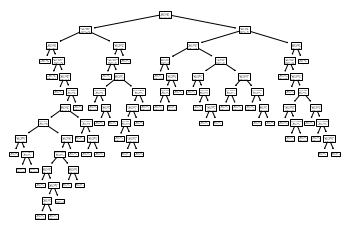

In [23]:
tree.plot_tree(clf) 

Predict 
to predict y, you pass x_test into the model
y_pred is what output of x_test is compared with.

In [0]:
y_pred =clf.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

To calculate accuracy:
use sklearn.metrics

Compares between y_pred and y_test

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.925

Classification report -  to test how good the model is

In [27]:
from sklearn.metrics import classification_report

classes = ['0','1']

classification_report(y_test, y_pred, target_names=classes)

'              precision    recall  f1-score   support\n\n           0       0.98      0.91      0.94        53\n           1       0.84      0.96      0.90        27\n\n    accuracy                           0.93        80\n   macro avg       0.91      0.93      0.92        80\nweighted avg       0.93      0.93      0.93        80\n'

Visualizing as actual vs predicted

In [29]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

df

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,1
...,...,...
75,0,0
76,1,1
77,0,0
78,1,1


In [0]:
Plotting bar graph to see how it looks

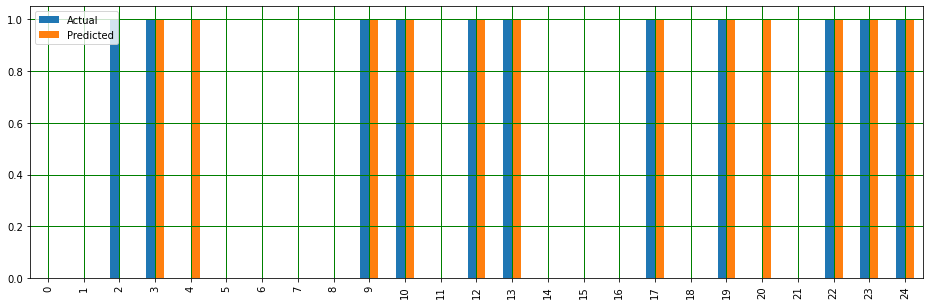

In [33]:
df1 = df.head(25)  # graph with top 25 rows of original data frame
df1.plot(kind='bar', figsize=(16,5))   #bargraph any values to make its size.
plt.grid(which='major', linestyle='-',linewidth='1', color='green')
plt.grid(which='minor', linestyle=':',linewidth='1', color='black')
plt.show()